## Guia da Camada Física
O documento tem o objetivo de demostrar o funcionamento da camda física,além de suas funções e ferramentas.

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger
import random
Logger.activate(Logger)

Será instaciada a rede e definida a topologia de Grade

2024-06-16 19:26:39,527: Qubit 0 adicionado à memória do Host 0.
2024-06-16 19:26:39,527: Qubit 0 criado com fidelidade inicial 0.5321513973780918 e adicionado à memória do Host 0.
2024-06-16 19:26:39,527: Qubit 1 adicionado à memória do Host 0.
2024-06-16 19:26:39,527: Qubit 1 criado com fidelidade inicial 0.004408455099646824 e adicionado à memória do Host 0.
2024-06-16 19:26:39,527: Qubit 2 adicionado à memória do Host 0.
2024-06-16 19:26:39,532: Qubit 2 criado com fidelidade inicial 0.21127915334158376 e adicionado à memória do Host 0.
2024-06-16 19:26:39,532: Qubit 3 adicionado à memória do Host 0.
2024-06-16 19:26:39,532: Qubit 3 criado com fidelidade inicial 0.4682699040144095 e adicionado à memória do Host 0.
2024-06-16 19:26:39,532: Qubit 4 adicionado à memória do Host 1.
2024-06-16 19:26:39,532: Qubit 4 criado com fidelidade inicial 0.5371444845104181 e adicionado à memória do Host 1.
2024-06-16 19:26:39,535: Qubit 5 adicionado à memória do Host 1.
2024-06-16 19:26:39,535: Qu

Hosts inicializados
Canais inicializados


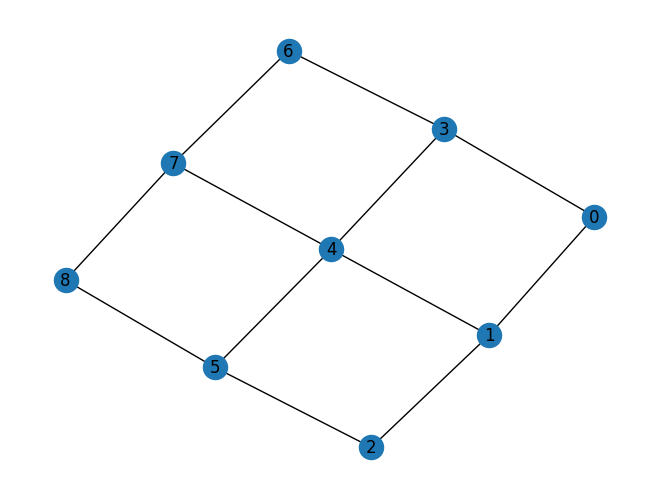

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,3)
rede.draw()

In [3]:
#Esse código basicamente seleciona aleatoriamente uma aresta do grafo da rede e imprime tanto todas as arestas quanto a aresta selecionada aleatoriamente.
arestas = list(rede.edges)
print(arestas)
aresta_aleatorias = random.sample(arestas, 1)[0]
print(aresta_aleatorias)

[(0, 3), (0, 1), (1, 4), (1, 2), (2, 5), (3, 6), (3, 4), (4, 7), (4, 5), (5, 8), (6, 7), (7, 8)]
(1, 4)


In [4]:

#Deseguinando quem será Alice e Bob
x,y = aresta_aleatorias
alice = rede.get_host(x)
bob = rede.get_host(y)

h1 = Qubit(1)
h2 = Qubit(2)

#Adcionando qubits aos hosts
alice.add_qubit(h1)
bob.add_qubit(h2)



2024-06-16 19:26:40,297: Qubit 1 adicionado à memória do Host 1.
2024-06-16 19:26:40,299: Qubit 2 adicionado à memória do Host 4.


In [5]:
#É possível acessar a memória dos dois hosts
print(alice.memory)
print(bob.memory)

[<quantumnet.objects.qubit.Qubit object at 0x000001D9FFE98110>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C7210>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C7350>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C72D0>, <quantumnet.objects.qubit.Qubit object at 0x000001D990A89C10>]
[<quantumnet.objects.qubit.Qubit object at 0x000001D9818D3C90>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818D3CD0>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818D0210>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818D3F50>, <quantumnet.objects.qubit.Qubit object at 0x000001D990A5F590>]


In [7]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

[<quantumnet.objects.qubit.Qubit object at 0x000001D9FFE98110>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C7210>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C7350>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C72D0>]
Qubit 1 with state None


In [8]:
#Pode medir a fidelidade por meio dessa função
rede.physical.fidelity_measurement(h1,h2)

2024-06-16 19:26:40,341: A fidelidade entre o qubit Qubit 1 with state None e o qubit Qubit 2 with state None é 0.13593254970443208


0.13593254970443208

In [9]:
#Pode se medir a fidelidade e acessar de somente um host
rede.physical.fidelity_measurement_only_one(h1)

2024-06-16 19:26:40,356: A fidelidade do qubit Qubit 1 with state None é 0.23901104021887198


0.23901104021887198

In [10]:
rede.physical.fidelity_measurement_only_one(h2)

2024-06-16 19:26:40,366: A fidelidade do qubit Qubit 2 with state None é 0.5687291665688463


0.5687291665688463

### É possível a criação de ECHP entre dois qubits de Alice e Bob

In [11]:
rede.physical.entanglement_creation_heralding_protocol(alice,bob)

2024-06-16 19:26:40,375: A fidelidade entre o qubit Qubit 7 with state None e o qubit Qubit 2 with state None é 0.2351402939453859
2024-06-16 19:26:40,375: O protocolo de criação de emaranhamento foi bem sucedido, mas com fidelidade baixa.


False

In [12]:
#Obtem-se o útimo qubit da memória de Alice
qub1 = alice.get_last_qubit()
print(alice.memory)
print(qub1)

[<quantumnet.objects.qubit.Qubit object at 0x000001D9FFE98110>, <quantumnet.objects.qubit.Qubit object at 0x000001D9818C7210>]
Qubit 6 with state None


In [13]:
#Obtem-se o útimo qubit da memória de Bob
qub2 = bob.get_last_qubit()
print(qub2)

Qubit 19 with state None


### Realiza-se o primeiro protocolo, on demand, que através da fidelidade inicial e da probabilidade de sucesso do on demand determina o sucesso do ECHP.

In [14]:
rede.physical.echp_on_demand(2,5)

2024-06-16 19:26:40,415: A fidelidade do qubit Qubit 11 with state None é 0.38588273614989177
2024-06-16 19:26:40,415: A fidelidade do qubit Qubit 23 with state None é 0.07421061890031133
2024-06-16 19:26:40,415: A probabilidade de sucesso do ECHP falhou.


False

### Realiza-se, então, o segundo protocolo, on replay, que através da fidelidade inicial e da probabilidade de sucesso do on replay determina o sucesso do ECHP.

In [15]:
rede.physical.echp_on_replay(2,5)

2024-06-16 19:26:40,431: A fidelidade do qubit Qubit 10 with state None é 0.21194806608603356
2024-06-16 19:26:40,431: A fidelidade do qubit Qubit 22 with state None é 0.17099716752142513
2024-06-16 19:26:40,431: A probabilidade de sucesso do ECHP falhou.


False

In [16]:
#Pode-se acessar o canal que mostrar as pprobablidades e os pares eprs.
rede.edges[2,5]

{'prob_on_demand_epr_create': 0.8277569407374143,
 'prob_replay_epr_create': 0.9098410226259295,
 'eprs': []}

In [17]:
#Além de poder acessar o dicionario que contém os pares eprs alocados.
rede.get_eprs()

{(0, 3): [],
 (0, 1): [],
 (1, 4): [],
 (1, 2): [],
 (2, 5): [],
 (3, 6): [],
 (3, 4): [],
 (4, 7): [],
 (4, 5): [],
 (5, 8): [],
 (6, 7): [],
 (7, 8): []}